<a href="https://colab.research.google.com/github/Sau152004/assignement8/blob/main/chapter_appendix-tools-for-deep-learning/jupyter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using Jupyter Notebooks
:label:`sec_jupyter`


This section describes how to edit and run the code
in each section of this book
using the Jupyter Notebook. Make sure you have
installed Jupyter and downloaded the
code as described in
:ref:`chap_installation`.
If you want to know more about Jupyter see the excellent tutorial in
their [documentation](https://jupyter.readthedocs.io/en/latest/).


## Editing and Running the Code Locally

Suppose that the local path of the book's code is `xx/yy/d2l-en/`. Use the shell to change the directory to this path (`cd xx/yy/d2l-en`) and run the command `jupyter notebook`. If your browser does not do this automatically, open http://localhost:8888 and you will see the interface of Jupyter and all the folders containing the code of the book, as shown in :numref:`fig_jupyter00`.

![The folders containing the code of this book.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter00.png?raw=1)
:width:`600px`
:label:`fig_jupyter00`


You can access the notebook files by clicking on the folder displayed on the webpage.
They usually have the suffix ".ipynb".
For the sake of brevity, we create a temporary "test.ipynb" file.
The content displayed after you click it is
shown in :numref:`fig_jupyter01`.
This notebook includes a markdown cell and a code cell. The content in the markdown cell includes "This Is a Title" and "This is text.".
The code cell contains two lines of Python code.

![Markdown and code cells in the "text.ipynb" file.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter01.png?raw=1)
:width:`600px`
:label:`fig_jupyter01`


Double click on the markdown cell to enter edit mode.
Add a new text string "Hello world." at the end of the cell, as shown in :numref:`fig_jupyter02`.

![Edit the markdown cell.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter02.png?raw=1)
:width:`600px`
:label:`fig_jupyter02`


As demonstrated in :numref:`fig_jupyter03`,
click "Cell" $\rightarrow$ "Run Cells" in the menu bar to run the edited cell.

![Run the cell.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter03.png?raw=1)
:width:`600px`
:label:`fig_jupyter03`

After running, the markdown cell is shown in :numref:`fig_jupyter04`.

![The markdown cell after running.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter04.png?raw=1)
:width:`600px`
:label:`fig_jupyter04`


Next, click on the code cell. Multiply the elements by 2 after the last line of code, as shown in :numref:`fig_jupyter05`.

![Edit the code cell.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter05.png?raw=1)
:width:`600px`
:label:`fig_jupyter05`


You can also run the cell with a shortcut ("Ctrl + Enter" by default) and obtain the output result from :numref:`fig_jupyter06`.

![Run the code cell to obtain the output.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter06.png?raw=1)
:width:`600px`
:label:`fig_jupyter06`


When a notebook contains more cells, we can click "Kernel" $\rightarrow$ "Restart & Run All" in the menu bar to run all the cells in the entire notebook. By clicking "Help" $\rightarrow$ "Edit Keyboard Shortcuts" in the menu bar, you can edit the shortcuts according to your preferences.

## Advanced Options

Beyond local editing two things are quite important: editing the notebooks in the markdown format and running Jupyter remotely.
The latter matters when we want to run the code on a faster server.
The former matters since Jupyter's native ipynb format stores a lot of auxiliary data that is
irrelevant to the content,
mostly related to how and where the code is run.
This is confusing for Git, making
reviewing contributions very difficult.
Fortunately there is an alternative---native editing in the markdown format.

### Markdown Files in Jupyter

If you wish to contribute to the content of this book, you need to modify the
source file (md file, not ipynb file) on GitHub.
Using the notedown plugin we
can modify notebooks in the md format directly in Jupyter.


First, install the notedown plugin, run the Jupyter Notebook, and load the plugin:

```
pip install d2l-notedown  # You may need to uninstall the original notedown.
jupyter notebook --NotebookApp.contents_manager_class='notedown.NotedownContentsManager'
```

You may also turn on the notedown plugin by default whenever you run the Jupyter Notebook.
First, generate a Jupyter Notebook configuration file (if it has already been generated, you can skip this step).

```
jupyter notebook --generate-config
```

Then, add the following line to the end of the Jupyter Notebook configuration file (for Linux or macOS, usually in the path `~/.jupyter/jupyter_notebook_config.py`):

```
c.NotebookApp.contents_manager_class = 'notedown.NotedownContentsManager'
```

After that, you only need to run the `jupyter notebook` command to turn on the notedown plugin by default.

### Running Jupyter Notebooks on a Remote Server

Sometimes, you may want to run Jupyter notebooks on a remote server and access it through a browser on your local computer. If Linux or macOS is installed on your local machine (Windows can also support this function through third-party software such as PuTTY), you can use port forwarding:

```
ssh myserver -L 8888:localhost:8888
```

The above string `myserver` is the address of the remote server.
Then we can use http://localhost:8888 to access the remote server `myserver` that runs Jupyter notebooks. We will detail on how to run Jupyter notebooks on AWS instances
later in this appendix.

### Timing

We can use the `ExecuteTime` plugin to time the execution of each code cell in Jupyter notebooks.
Use the following commands to install the plugin:

```
pip install jupyter_contrib_nbextensions
jupyter contrib nbextension install --user
jupyter nbextension enable execute_time/ExecuteTime
```

## Summary

* Using the Jupyter Notebook tool, we can edit, run, and contribute to each section of the book.
* We can run Jupyter notebooks on remote servers using port forwarding.


## Exercises

1. Edit and run the code in this book with the Jupyter Notebook on your local machine.
1. Edit and run the code in this book with the Jupyter Notebook *remotely* via port forwarding.
1. Compare the running time of the operations $\mathbf{A}^\top \mathbf{B}$ and $\mathbf{A} \mathbf{B}$ for two square matrices in $\mathbb{R}^{1024 \times 1024}$. Which one is faster?


[Discussions](https://discuss.d2l.ai/t/421)


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [2]:
# Simulate a plant disease dataset (replace with real data)
np.random.seed(42)
num_samples = 1000

# Features: leaf_area, leaf_color, spots_present, spots_color, stem_condition, growth_rate
# Target: disease_present (0 = healthy, 1 = diseased)
data = {
    'leaf_area': np.random.normal(15, 5, num_samples),
    'leaf_color': np.random.randint(0, 3, num_samples),  # 0: green, 1: yellow, 2: brown
    'spots_present': np.random.randint(0, 2, num_samples),  # 0: no, 1: yes
    'spots_color': np.random.randint(0, 4, num_samples),  # 0: none, 1: white, 2: black, 3: brown
    'stem_condition': np.random.randint(0, 3, num_samples),  # 0: healthy, 1: weak, 2: damaged
    'growth_rate': np.random.normal(0.5, 0.2, num_samples),
    'disease_present': np.random.randint(0, 2, num_samples)  # Target variable
}

plant_data = pd.DataFrame(data)

# Display first 5 rows
print("First 5 rows of the dataset:")
print(plant_data.head())

# Check target distribution
print("\nDistribution of Target (Disease Present):")
print(plant_data['disease_present'].value_counts())

First 5 rows of the dataset:
   leaf_area  leaf_color  spots_present  spots_color  stem_condition  \
0  17.483571           2              0            2               2   
1  14.308678           0              1            2               1   
2  18.238443           2              1            3               2   
3  22.615149           0              1            2               1   
4  13.829233           2              0            0               0   

   growth_rate  disease_present  
0     0.528418                1  
1     0.614940                0  
2     0.648431                0  
3     0.699763                0  
4     0.774423                1  

Distribution of Target (Disease Present):
disease_present
1    521
0    479
Name: count, dtype: int64


In [3]:
X = plant_data.drop(columns='disease_present', axis=1)  # Features
Y = plant_data['disease_present']  # Target

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

print("\nData Shapes:")
print("Full dataset:", X.shape)
print("Training set:", X_train.shape)
print("Test set:", X_test.shape)



Data Shapes:
Full dataset: (1000, 6)
Training set: (800, 6)
Test set: (200, 6)


In [4]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=2),
    "Support Vector Machine": SVC(kernel='linear', probability=True, random_state=2),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "XGBoost": XGBClassifier(random_state=2)
}

# Dictionary to store accuracy
accuracy_scores = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, Y_train)

    # Training accuracy
    train_pred = model.predict(X_train)
    train_acc = accuracy_score(train_pred, Y_train)

    # Test accuracy
    test_pred = model.predict(X_test)
    test_acc = accuracy_score(test_pred, Y_test)

    accuracy_scores[name] = {
        'Train Accuracy': train_acc,
        'Test Accuracy': test_acc
    }

    print(f"\n{name}:")
    print(f"Training Accuracy: {train_acc:.4f}")
    print(f"Test Accuracy: {test_acc:.4f}")



Logistic Regression:
Training Accuracy: 0.5212
Test Accuracy: 0.5500

Random Forest:
Training Accuracy: 1.0000
Test Accuracy: 0.5150

Support Vector Machine:
Training Accuracy: 0.5212
Test Accuracy: 0.5200

K-Nearest Neighbors:
Training Accuracy: 0.6850
Test Accuracy: 0.4850

XGBoost:
Training Accuracy: 1.0000
Test Accuracy: 0.4650


<Figure size 1000x600 with 0 Axes>

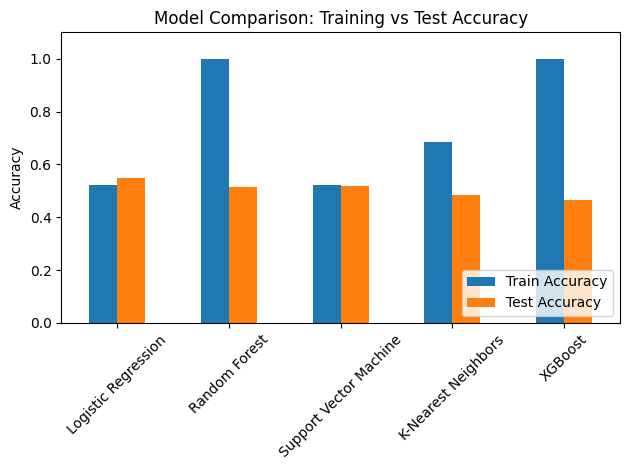


Best Model: Logistic Regression (Test Accuracy: 0.5500)


In [5]:
# Convert accuracy scores to DataFrame
accuracy_df = pd.DataFrame(accuracy_scores).T

# Plot comparison
plt.figure(figsize=(10, 6))
accuracy_df.plot(kind='bar', y=['Train Accuracy', 'Test Accuracy'])
plt.title('Model Comparison: Training vs Test Accuracy')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.ylim(0, 1.1)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# Find the best model
best_model_name = accuracy_df['Test Accuracy'].idxmax()
best_model = models[best_model_name]
print(f"\nBest Model: {best_model_name} (Test Accuracy: {accuracy_df.loc[best_model_name, 'Test Accuracy']:.4f})")


In [6]:
# Example input (replace with real plant features)
input_data = (14.5, 1, 1, 2, 1, 0.4)  # leaf_area, leaf_color, spots_present, spots_color, stem_condition, growth_rate

# Convert to numpy array and reshape
input_array = np.asarray(input_data).reshape(1, -1)

# Predict
prediction = best_model.predict(input_array)

print("\nPrediction for Input Data:", input_data)
if prediction[0] == 0:
    print("Prediction: Healthy Plant")
else:
    print("Prediction: Diseased Plant")

# Show confidence (if available)
if hasattr(best_model, "predict_proba"):
    proba = best_model.predict_proba(input_array)
    print(f"Confidence: Healthy {proba[0][0]:.2f}, Diseased {proba[0][1]:.2f}")


Prediction for Input Data: (14.5, 1, 1, 2, 1, 0.4)
Prediction: Diseased Plant
Confidence: Healthy 0.47, Diseased 0.53


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
